In [1]:
'''Train a simple deep CNN on myl images dataset.

GPU run command:
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python cifar10_cnn.py ???
'''

from __future__ import print_function


from img_loader_test import test
from img_loader_train import train
#import img_loader_test
#import img_loader_train

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

resize=32
batch_size = 10
train_output=train(resize)
nb_classes = train_output[2]
test_output=test(resize)
nb_epoch = 200
data_augmentation = False

# input image dimensions
#rs=train_output[3]
rs=resize
img_rows=rs #must be the same as the rs in the img_loader_* files
img_cols = rs
# the JPEG images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
X_train =train_output[0]
y_train=train_output[1]
X_test=test_output[0]
y_test=test_output[1]
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(16, 7, 7, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
#model.add(Convolution2D(32, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#odel.add(Dropout(0.25))

#model.add(Convolution2D(64, 3, 3, border_mode='same'))
#model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.05, decay=1e-5, momentum=0.3, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(X_train)

    # fit the model on the batches generated by datagen.flow()
    model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))
    model.summary()
    w1,b1,w2,b2,w3,b3=model.get_weights()


Using TensorFlow backend.


X_train shape: (150, 3, 32, 32)
150 train samples
4 test samples
Not using data augmentation.
Train on 150 samples, validate on 4 samples
Epoch 1/200
150/150 [==============================] - 0s - loss: 0.9441 - acc: 0.5067 - val_loss: 0.6822 - val_acc: 0.5000
Epoch 2/200
150/150 [==============================] - 0s - loss: 0.6654 - acc: 0.5600 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 3/200
150/150 [==============================] - 0s - loss: 0.6575 - acc: 0.5800 - val_loss: 0.5545 - val_acc: 1.0000
Epoch 4/200
150/150 [==============================] - 0s - loss: 0.6502 - acc: 0.6333 - val_loss: 0.4884 - val_acc: 1.0000
Epoch 5/200
150/150 [==============================] - 0s - loss: 0.6296 - acc: 0.6600 - val_loss: 0.6545 - val_acc: 0.5000
Epoch 6/200
150/150 [==============================] - 0s - loss: 0.6794 - acc: 0.6600 - val_loss: 0.6100 - val_acc: 0.7500
Epoch 7/200
150/150 [==============================] - 0s - loss: 0.8063 - acc: 0.5800 - val_loss: 0.6866 - val_acc: 0

a=test()

In [15]:
w1,b1,w2,b2,w3,b3=model.get_weights()
print (w1.shape)

(16, 3, 7, 7)


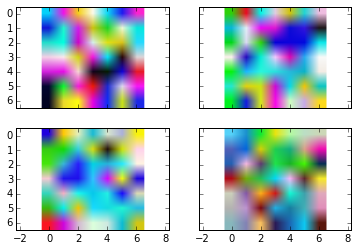

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

w1_t=np.ndarray.transpose(w1,(0,3,2,1))
sx=2
sy=2
f,con=plt.subplots(sx,sy,sharex='col',sharey='row')

for xx in range(sx):
    for yy in range(sy):
        con[xx,yy].imshow(w1_t[xx*2+yy,:,:,:])
